# Principal Component Analysis 
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
sns.set()

## Application 1: Iris Dataset
![img](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

* What is the biggest motivation?
* What will we gonna do here?
* **Resources:** https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


In [ ]:
# from sklearn.datasets import load_iris

# load_iris()

In [ ]:
# print(load_iris()['DESCR'])

In [6]:
df.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

## Step 1: Standardize the Data

In [7]:
from sklearn.preprocessing import StandardScaler # (mean = 0 and variance = 1) 

In [8]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [9]:
# Separating out the features
X = df.loc[:, features].values

In [10]:
pd.DataFrame(X).head()

,0,1,2,3
0,5.100,3.500,1.400,0.200
1,4.900,3.000,1.400,0.200
2,4.700,3.200,1.300,0.200
3,4.600,3.100,1.500,0.200
4,5.000,3.600,1.400,0.200


In [11]:
# Standardizing the features
X_transf = StandardScaler().fit_transform(X) # fit transform calcula média e desvio padrão para normalização dos dados
# e já transforma os dados - (valor - media)/desvio padrão

In [19]:
type(X_transf)

numpy.ndarray

In [12]:
pd.DataFrame(X_transf).head()

,0,1,2,3
0,-0.901,1.032,-1.341,-1.313
1,-1.143,-0.125,-1.341,-1.313
2,-1.385,0.338,-1.398,-1.313
3,-1.507,0.106,-1.284,-1.313
4,-1.022,1.263,-1.341,-1.313


In [13]:
pd.DataFrame(X_transf).describe()

,0,1,2,3
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.439,-1.569,-1.444
25%,-0.901,-0.588,-1.228,-1.182
50%,-0.053,-0.125,0.336,0.133
75%,0.675,0.569,0.763,0.791
max,2.492,3.115,1.786,1.711


In [14]:
# Separating out the target
y = df.loc[:, ['target']].values

## Step 2: PCA Projection to 2D
* 4 dimensions -> 2 dimensions
* You lose some of the variance (information) when you do this. But, how much?

In [15]:
from sklearn.decomposition import PCA # newness!

In [16]:
# number of columns I want after the transformation
pca = PCA(n_components=2)

In [17]:
principal_components = pca.fit_transform(X_transf)

In [20]:
principal_components[: 5]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [21]:
# creating a new dataframe using the two new variables you just create
pc_df = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2'])

In [22]:
pc_df.head()

,pc1,pc2
0,-2.265,0.506
1,-2.086,-0.655
2,-2.368,-0.318
3,-2.304,-0.575
4,-2.389,0.675


In [23]:
final_df = pd.concat([pc_df, df[['target']]], axis = 1)
final_df.head()

,pc1,pc2,target
0,-2.265,0.506,Iris-setosa
1,-2.086,-0.655,Iris-setosa
2,-2.368,-0.318,Iris-setosa
3,-2.304,-0.575,Iris-setosa
4,-2.389,0.675,Iris-setosa


## Step 3: Analysis

### 3.1 Data Visualization

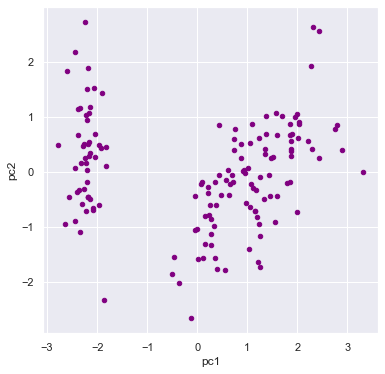

In [24]:
final_df.plot(x='pc1', y='pc2', c='purple', kind='scatter', figsize=(6, 6));

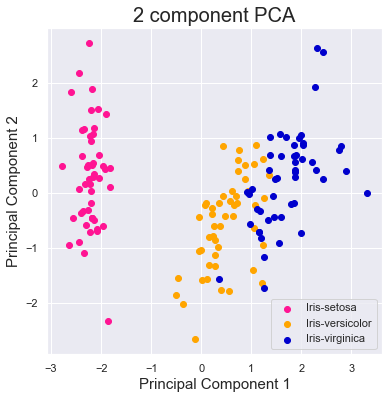

In [25]:
# Notice on the graph below that the classes seem well separated from each other.
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['deeppink', 'orange', 'mediumblue']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'pc1']
               , final_df.loc[indicesToKeep, 'pc2']
               , c = color)

ax.legend(targets)

### 3.2 Explained Variance

* You can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance;
* Together, the two components contains 95.80% of the information

In [26]:
import numpy as np

In [27]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [28]:
np.sum(pca.explained_variance_ratio_)

0.9580097536148199

### 3.3 Loading Scores

In [29]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [30]:
pd.DataFrame(X_transf).head()

,0,1,2,3
0,-0.901,1.032,-1.341,-1.313
1,-1.143,-0.125,-1.341,-1.313
2,-1.385,0.338,-1.398,-1.313
3,-1.507,0.106,-1.284,-1.313
4,-1.022,1.263,-1.341,-1.313


In [31]:
final_df.head()

,pc1,pc2,target
0,-2.265,0.506,Iris-setosa
1,-2.086,-0.655,Iris-setosa
2,-2.368,-0.318,Iris-setosa
3,-2.304,-0.575,Iris-setosa
4,-2.389,0.675,Iris-setosa


In [ ]:
# Novo X: Quando estamos fazendo essa transformação, estamos descobrindo a correspondência das 4 variáveis na reta de PC1
(0.52237162*-0.901)+(-0.26335492*1.032)+(0.58125401*-1.341)+(0.56561105*-1.313)

In [ ]:
# Novo Y
(0.37231836*-0.901)+(0.92555649*1.032)+(0.02109478*-1.341)+(0.06541577*-1.313)

## Bonus 1: Using more than 2 PCs

In [32]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_transf)
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [33]:
np.sum(pca.explained_variance_ratio_)

0.9948480731910938

---
## Understanding the PC Algorithm
Great Explanation of how it works: https://www.youtube.com/watch?v=FgakZw6K1QQ

### Using PCA in 2-D (?) to understand its concept
Imagine a dataset with the following composition:

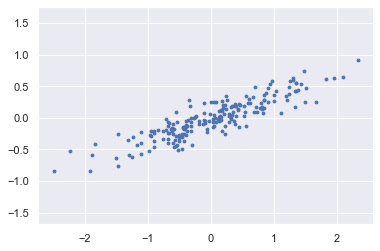

In [34]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=1, s=8)
plt.axis('equal');

This dataset is comprised of two dimensions. The first column is the X[:, 0] (which, in the graph, is represented by the x-axis) and the second column, X[:, 1] (which, in the graph, is represented by the y-axis).

If we think about the information contained in this data, we could imagine that the axis where the information is <b>really</b> contained is neighter x nor the y axis. It is, rather, an axis somewhere in between.

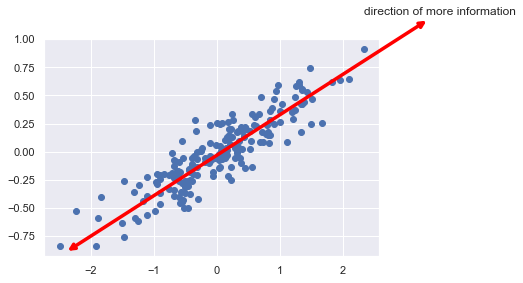

In [35]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=1)
plt.annotate('direction of more information', xy=(min(X[:,0])+0.1, min(X[:,1])-.05), xytext=(max(X[:,0]), max(X[:,1])+0.3), arrowprops=dict(arrowstyle= '<->', color='red', lw=3.5, ls='-'));

Specifically, it seems to be a combination of both the first and second dimensions. Indeed, it is. 

The PCA algorithm will try to find the directions in which the most information is contained. By information, we always mean to say - variance.

Rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between your features (your `X`).

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # instanciar o modelo. o número de colunas final que eu quero ter no meu modelo é 2.
pca.fit(X)

PCA(n_components=2)

The <b>fit method</b> learns some quantities from the data, most importantly the "components" and "explained variance":

In [37]:
pca.components_ # retorna o quanto das minhas colunas explicam o que? a transformação que meu PCA fez; # loading scores/eigenvectors

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [38]:
pca.components_[0]

array([-0.94446029, -0.32862557])

The first component of a PCA method is always the component that contains the most information. What this component is doing is taking what is called as `a linear combination of the original columns`. In this case, the results show that the PCA decided to take $-0.94$ of the first column (`X[:,0]`) and $-0.32$ of the second dimension (`X[:, 1]`). Let's take a look at the second component `pca.components_[1]`

In [39]:
pca.components_[1]

array([-0.32862557,  0.94446029])

This is telling us that the second component of our data (the second most important combination of features) is comprised by taking the first dimension and multiplying it by $-0.32$ and taking the second dimension and multiplying it by $0.94$.

### Explained Variance

Another important aspect of the results is the `explained_variance`. It can be obtained by the `pca.explained_variance` attibute.

In [40]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

For this case, we observe that only 1 component explains ~97% of the variance (information) in our data. **It means that you can reduce the number of dimensions to 1, and it will still retain ~97% of its signal.**

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:



[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]


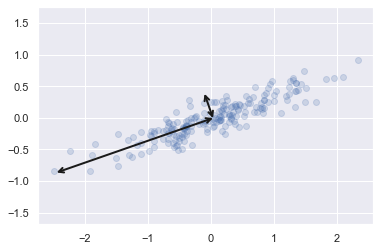

In [41]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='<->', color='k',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    print(v0, v1)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

In [ ]:
# pca.transform(X)

In [42]:
pc1 = pca.transform(X)[:,0]
pc2 = pca.transform(X)[:,1]

[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]
[0 0] [ 2.61969149e+00 -1.60409840e-16]
[0 0] [4.99411294e-17 4.07800269e-01]


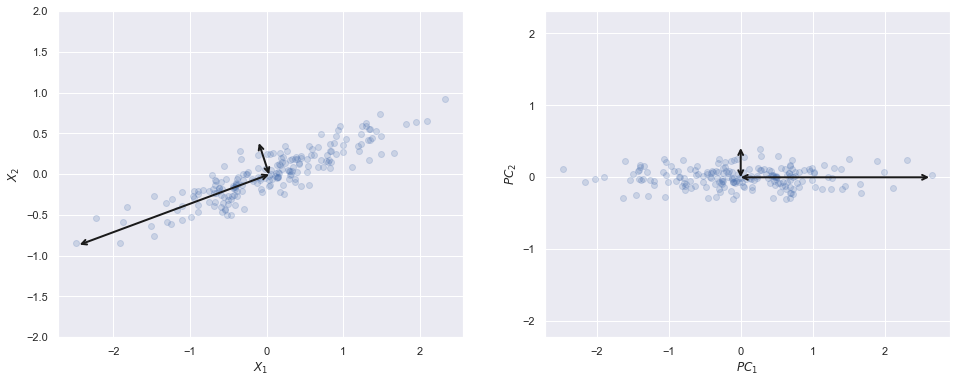

In [43]:
# plot data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax1)
ax1.set_ylim([-2,2])


ax2.scatter(pc1, pc2, alpha=0.2, )
count = 0
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    count += np.pi/2
    draw_vector(np.array([0, 0]) , np.array([np.sin(count) * np.sqrt(length) * 3, -np.cos(count) * np.sqrt(length) * 3]) , ax=ax2)
    
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')

ax2.set_xlabel('$PC_1$')
ax2.set_ylabel('$PC_2$')
plt.axis('equal');

So what the PCA has done was effectively rotate the original features into a new dimension that was more suitable. Now, you have at the x-axis a variable that contains most of the information, and at the y-axis a variable that contains the following most information (although in this case it is so small).

## Application 2: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. 

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [45]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [46]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [47]:
digits['data'][3].reshape(8,8)

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

In [48]:
digits['target'][3]

3

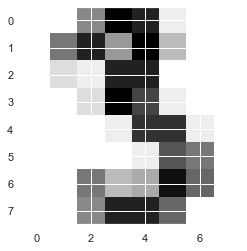

In [49]:
plt.imshow(digits['data'][3].reshape(8,8), cmap='binary')

In [50]:
X = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(64)])
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
0,0.000,0.000,5.000,13.000,9.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,6.000,13.000,10.000,0.000,0.000,0.000
1,0.000,0.000,0.000,12.000,13.000,5.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,11.000,16.000,10.000,0.000,0.000
2,0.000,0.000,0.000,4.000,15.000,12.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,3.000,11.000,16.000,9.000,0.000
3,0.000,0.000,7.000,15.000,13.000,1.000,0.000,0.000,0.000,8.000,...,9.000,0.000,0.000,0.000,7.000,13.000,13.000,9.000,0.000,0.000
4,0.000,0.000,0.000,1.000,11.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,2.000,16.000,4.000,0.000,0.000


Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [51]:
pca = PCA(2) 

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

pca.fit(X_std)

PCA(n_components=2)

In [52]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [53]:
pca.explained_variance_ratio_.sum()

0.2159497049296675

### Transform from 64 variables to 2 variables

In [54]:
pc1 = pca.transform(X_std)[:, 0]
pc2 = pca.transform(X_std)[:, 1]

In [55]:
import pandas as pd
df = pd.DataFrame({'pc1': pc1, 'pc2':pc2, 'target': digits.target})
df.head()

,pc1,pc2,target
0,1.914,-0.954,0
1,0.589,0.925,1
2,1.302,-0.317,2
3,-3.021,-0.869,3
4,4.529,-1.093,4


We can now plot the first two principal components of each point to learn about the data:

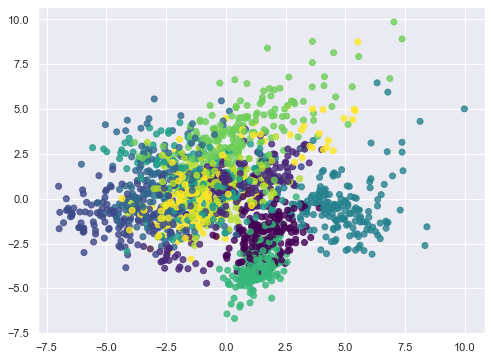

In [56]:
ax, fig = plt.subplots(figsize=(8,6))
plt.scatter(pc1, pc2, c=df.target, cmap='viridis', alpha=0.8)

In [57]:
len(pca.components_)

2

In [58]:
len(pca.components_[0])

64

In [59]:
digits.target.shape

(1797,)

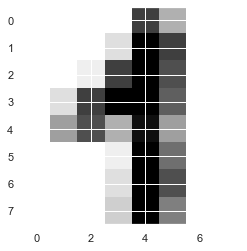

In [60]:
plt.imshow(digits['data'][42].reshape(8,8), cmap='binary')

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

In [61]:
pca = PCA(64)
pca.fit(X_std)

PCA(n_components=64)

In [62]:
pca.n_components_

64

In [63]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

In [64]:
pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732, 0.81933664, 0.83099501, 0.84157148, 0.85132464,
       0.86077023, 0.86940036, 0.87776679, 0.88574372, 0.89320844,
       0.90046426, 0.90738337, 0.91392246, 0.92033038, 0.92624422,
       0.93195585, 0.93719222, 0.94201029, 0.94654748, 0.95077911,
       0.95483964, 0.95881049, 0.96237542, 0.9657833 , 0.96906165,
       0.97217197, 0.97505772, 0.97782262, 0.98041436, 0.98275919,
       0.98494176, 0.98697774, 0.98893286, 0.99076605, 0.99244551,
       0.99405787, 0.9955355 , 0.99688668, 0.99813769, 0.99917465,
       1.        , 1.        , 1.        , 1.        ])

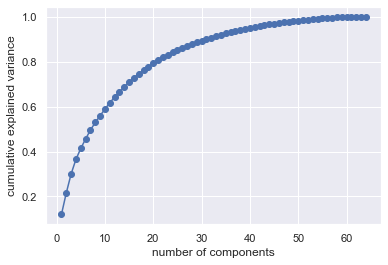

In [65]:
plt.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [69]:
pca = PCA(0.8)
pca.fit(X_std)
pca.n_components_

21

In [71]:
pca = PCA(0.9)
pca.fit(X_std)
pca.n_components_

31

## Application 3: PCA for noise reduction: 
https://en.wikipedia.org/wiki/Noise_reduction

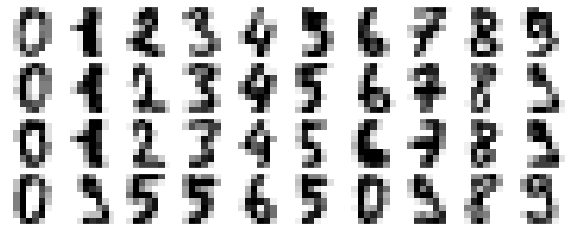

In [72]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [73]:
np.random.normal(digits.data, 4)

array([[-3.55548376,  6.29724703, -3.39027974, ..., -1.79634099,
        -5.44258302,  6.99747311],
       [ 4.29779564, -0.94595391,  0.13810538, ...,  8.86546883,
         5.96208061,  0.66233439],
       [ 1.15891755, -1.3957058 ,  0.15476002, ..., 12.70000385,
        14.54466549,  9.19951463],
       ...,
       [ 1.64789117,  9.26844846, -5.62701525, ...,  2.87806948,
        -4.01442893,  3.83406826],
       [-1.46837416, 11.45990858,  5.23047771, ...,  7.96652062,
         1.65451951,  2.29907948],
       [ 2.6626251 , -0.39033574,  7.27743262, ..., 14.02013181,
        -1.44190027,  1.3904616 ]])

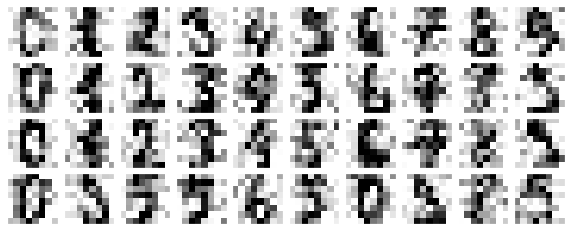

In [74]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [75]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

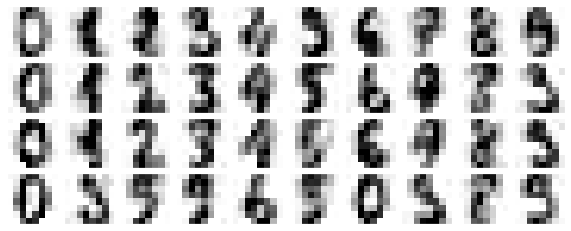

In [76]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)